clang: warning: libstdc++ is deprecated; move to libc++ with a minimum deployment target of OS X 10.9 [-Wdeprecated]
ld: library not found for -lstdc++
clang: error: linker command failed with exit code 1 (use -v to see invocation)
WARNING    Cannot use Cython, a test compilation failed: command 'g++' failed with exit status 1 (LinkError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 7


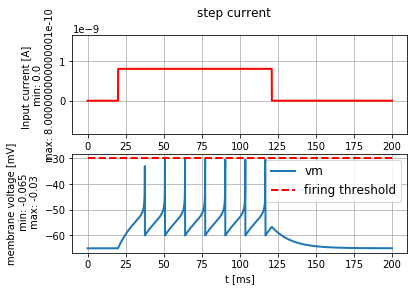

In [1]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [10]:
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV
FIRING_THRESHOLD_v_spike = -30. * b2.mV


nr of spikes: 7


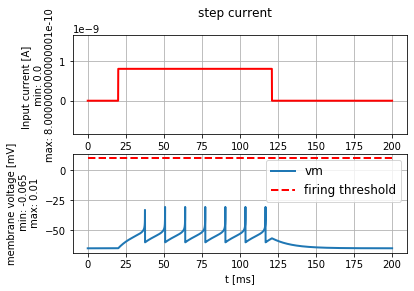

In [20]:
exp_IF.FIRING_THRESHOLD_v_spike = 10.*b2.mV
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    v_spike=10*b2.mV, I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [29]:
exp_IF.FIRING_THRESHOLD_v_spike = -30.*b2.mV

nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

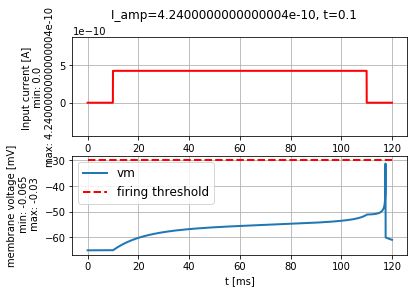

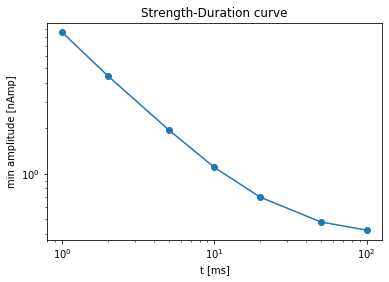

In [72]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

i=6  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [8.58, 4.42, 1.95, 1.10, .70, .48, .424]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.figure()
#plt.plot(durations, min_amp)
plt.loglog(durations, min_amp, 'o-')
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")